In [2]:
import pandas as pd
from sklearn.impute import SimpleImputer
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

In [3]:
# 1. Load the dataset

data = pd.read_csv("global-data-sustainable-energy.csv")

In [5]:
# 2. Display the first 20 rows

data.head(20)

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density (P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.20,9.22,20000.0,44.99,0.16,0.0,0.31,...,302.59482,1.64,760.000000,NaN,NaN,NaN,60,652230,33.93911,67.709953
1,Afghanistan,2001,4.074574,7.20,8.86,130000.0,45.60,0.09,0.0,0.50,...,236.89185,1.74,730.000000,NaN,NaN,NaN,60,652230,33.93911,67.709953
2,Afghanistan,2002,9.409158,8.20,8.47,3950000.0,37.83,0.13,0.0,0.56,...,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,652230,33.93911,67.709953
3,Afghanistan,2003,14.738506,9.50,8.09,25970000.0,36.66,0.31,0.0,0.63,...,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,652230,33.93911,67.709953
4,Afghanistan,2004,20.064968,10.90,7.75,NaN,44.24,0.33,0.0,0.56,...,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,652230,33.93911,67.709953
5,Afghanistan,2005,25.390894,12.20,7.51,9830000.0,33.88,0.34,0.0,0.59,...,252.06912,1.41,1549.999952,NaN,11.229715,242.031313,60,652230,33.93911,67.709953
6,Afghanistan,2006,30.718690,13.85,7.40,10620000.0,31.89,0.20,0.0,0.64,...,304.42090,1.50,1759.999990,NaN,5.357403,263.733602,60,652230,33.93911,67.709953
7,Afghanistan,2007,36.051010,15.30,7.25,15750000.0,28.78,0.20,0.0,0.75,...,354.27990,1.53,1769.999981,NaN,13.826320,359.693158,60,652230,33.93911,67.709953
8,Afghanistan,2008,42.400000,16.70,7.49,16170000.0,21.17,0.19,0.0,0.54,...,607.83350,1.94,3559.999943,NaN,3.924984,364.663542,60,652230,33.93911,67.709953
9,Afghanistan,2009,46.740050,18.40,7.50,9960000.0,16.53,0.16,0.0,0.78,...,975.04816,2.25,4880.000114,NaN,21.390528,437.268740,60,652230,33.93911,67.709953


In [11]:
# 3. Number of nulls in the dataset

data_null = data.isnull().sum().sum()
print(data_null)

6966


In [13]:
# 4. Impute the missing values with the mean values of the data. You can use SimpleImputer from sklearn.impute.

# Find columns with missing values 

data.isnull().sum()

Entity                                                                 0
Year                                                                   0
Access to electricity (% of population)                                9
Access to clean fuels for cooking                                    168
Renewable-electricity-generating-capacity-per-capita                 931
Financial flows to developing countries (US $)                      2088
Renewable energy share in the total final energy consumption (%)     194
Electricity from fossil fuels (TWh)                                   21
Electricity from nuclear (TWh)                                       126
Electricity from renewables (TWh)                                     21
Low-carbon electricity (% electricity)                                42
Primary energy consumption per capita (kWh/person)                     0
Energy intensity level of primary energy (MJ/$2017 PPP GDP)          206
Value_co2_emissions_kt_by_country                  

In [6]:
# 4 continued

imputer = SimpleImputer(strategy='mean')
data['Access to electricity (% of population)'] = imputer.fit_transform(data[['Access to electricity (% of population)']])
data['Access to clean fuels for cooking'] = imputer.fit_transform(data[['Access to clean fuels for cooking']])
data['Renewable-electricity-generating-capacity-per-capita'] = imputer.fit_transform(data[['Renewable-electricity-generating-capacity-per-capita']])
data['Financial flows to developing countries (US $)'] = imputer.fit_transform(data[['Financial flows to developing countries (US $)']])
data['Renewable energy share in the total final energy consumption (%)'] = imputer.fit_transform(data[['Renewable energy share in the total final energy consumption (%)']])
data['Electricity from fossil fuels (TWh)'] = imputer.fit_transform(data[['Electricity from fossil fuels (TWh)']])
data['Electricity from nuclear (TWh)'] = imputer.fit_transform(data[['Electricity from nuclear (TWh)']])
data['Electricity from renewables (TWh)'] = imputer.fit_transform(data[['Electricity from renewables (TWh)']])
data['Low-carbon electricity (% electricity)'] = imputer.fit_transform(data[['Low-carbon electricity (% electricity)']])
data['Energy intensity level of primary energy (MJ/$2017 PPP GDP)'] = imputer.fit_transform(data[['Energy intensity level of primary energy (MJ/$2017 PPP GDP)']])
data['Value_co2_emissions_kt_by_country'] = imputer.fit_transform(data[['Value_co2_emissions_kt_by_country']])
data['Renewables (% equivalent primary energy)'] = imputer.fit_transform(data[['Renewables (% equivalent primary energy)']])
data['gdp_growth'] = imputer.fit_transform(data[['gdp_growth']])
data['gdp_per_capita'] = imputer.fit_transform(data[['gdp_per_capita']])


In [13]:
# 5. Find the count, mean, standard deviation, quartiles and extrema for the numeric columns.

data.describe()

,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Land Area(Km2),Latitude,Longitude
count,3648.000000,3648.000000,3648.000000,3648.000000,3.648000e+03,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3.648000e+03,3648.000000,3648.000000,3648.000000,3.648000e+03,3648.000000,3648.000000
mean,2010.041118,78.933702,63.255287,112.920659,9.422400e+07,32.640712,70.384285,13.454009,23.974618,36.811387,25747.285360,5.307345,1.598665e+05,11.986707,3.441610,13283.774348,6.332135e+05,18.246388,14.822695
std,6.052776,30.238162,38.133777,210.522431,1.949380e+08,29.092763,347.094271,71.744227,104.143587,34.116009,34777.415694,3.430818,7.269605e+05,9.651627,5.434772,18935.329273,1.585519e+06,24.159232,66.348148
min,2000.000000,1.252269,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.110000,1.000000e+01,0.000000,-62.075920,111.927225,2.100000e+01,-40.900557,-175.198242
25%,2005.000000,59.916941,25.862500,8.380000,1.176500e+07,7.095000,0.300000,0.000000,0.050000,3.030303,3116.636825,3.220000,2.509557e+03,9.665936,1.651476,1464.841885,2.571300e+04,3.202778,-11.779889
50%,2010.000000,98.272340,78.875000,70.205000,9.422400e+07,26.695000,2.995000,0.000000,1.490000,28.571428,13118.841000,4.480000,1.808000e+04,11.986707,3.441610,5407.779533,1.176000e+05,17.189877,19.145136
75%,2015.000000,100.000000,100.000000,112.920659,9.422400e+07,52.612500,27.547500,0.000000,10.020000,64.038130,33897.402500,5.880000,1.408100e+05,11.986707,5.543696,13993.509465,5.131200e+05,38.969719,46.199616
max,2020.000000,100.000000,100.000000,3060.190000,5.202310e+09,96.040000,5184.130000,809.410000,2184.940000,100.000010,262585.700000,32.570000,1.070722e+07,86.836586,123.139555,123514.196700,9.984670e+06,64.963051,178.065032


In [24]:
# 6. Create a new column, northern_hem. For countries in the northern hemisphere, northern_hem = 1. Else, northern_hem = 0.


data['northern_hem'] = np.where(data['Latitude'] > 0, 1, 0)

                                                        Year  \
Year                                                1.000000   
Access to electricity (% of population)             0.124890   
Access to clean fuels for cooking                   0.073292   
Renewable-electricity-generating-capacity-per-c...  0.106000   
Financial flows to developing countries (US $)      0.141820   
Renewable energy share in the total final energ... -0.029537   
Electricity from fossil fuels (TWh)                 0.032536   
Electricity from nuclear (TWh)                     -0.004909   
Electricity from renewables (TWh)                   0.073859   
Low-carbon electricity (% electricity)              0.029649   
Primary energy consumption per capita (kWh/person)  0.004040   
Energy intensity level of primary energy (MJ/$2... -0.161605   
Value_co2_emissions_kt_by_country                   0.024759   
Renewables (% equivalent primary energy)            0.104767   
gdp_growth                              

<Axes: >

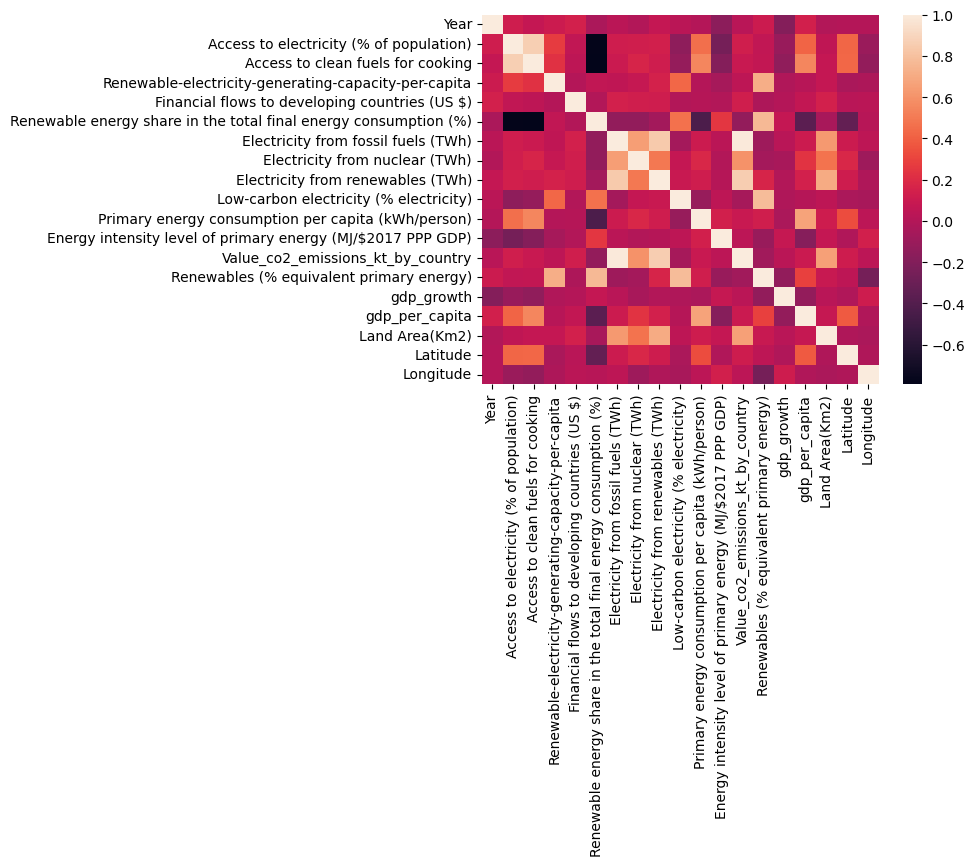

In [48]:
# 7. Find the correlation between the numeric columns and display your findings on a heatmap.


data_num = data[['Year', 'Access to electricity (% of population)', 'Access to clean fuels for cooking', 'Renewable-electricity-generating-capacity-per-capita', 'Financial flows to developing countries (US $)',
                'Renewable energy share in the total final energy consumption (%)', 'Electricity from fossil fuels (TWh)',
                'Electricity from nuclear (TWh)', 'Electricity from renewables (TWh)', 'Low-carbon electricity (% electricity)',
                'Primary energy consumption per capita (kWh/person)', 'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
                'Value_co2_emissions_kt_by_country', 'Renewables (% equivalent primary energy)', 'gdp_growth', 'gdp_per_capita',                                                      
                'Land Area(Km2)', 'Latitude', 'Longitude']]
corr = data_num.corr()
print(corr)

sns.heatmap(corr)

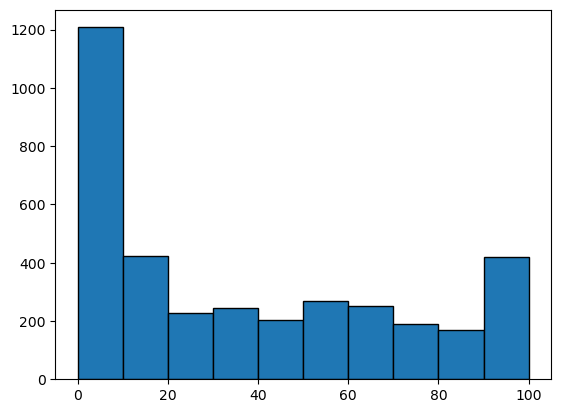

In [10]:
# 8. Plot a histogram of the Low-carbon electricity (% electricity).

plt.hist(data['Low-carbon electricity (% electricity)'], edgecolor = 'black')
plt.show()

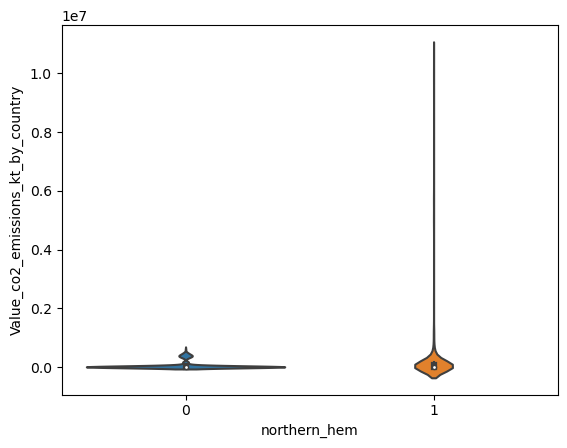

In [18]:
9. # Compare the Value_co2_emissions_kt_by_country in countries in the northern hemisphere to that in the southern hemisphere using violin plots next to each other.

sns.violinplot(x='northern_hem', y='Value_co2_emissions_kt_by_country',data=data)
plt.show()

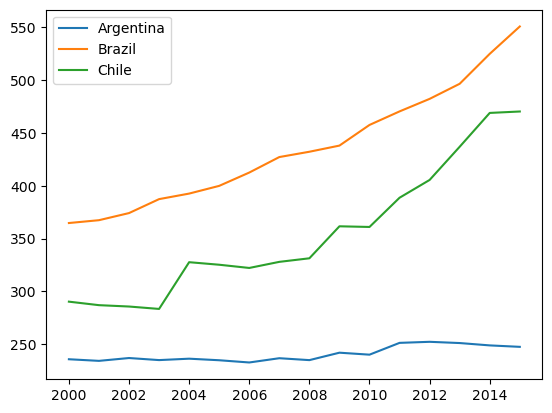

In [46]:
# 10. On the same line plot, display the Renewable-electricity-generating-capacity-per-capita from 2000 to 2015 for Argentina, Brazil and Chile.

data_2000_2015 = data[(data.Year >= 2000) & (data.Year <= 2015)]

data_argentina = data_2000_2015[data_2000_2015.Entity == 'Argentina']
data_brazil = data_2000_2015[data_2000_2015.Entity == 'Brazil']
data_chile = data_2000_2015[data_2000_2015.Entity == 'Chile']

plt.plot(data_argentina['Year'], data_argentina['Renewable-electricity-generating-capacity-per-capita'])
plt.plot(data_brazil['Year'], data_brazil['Renewable-electricity-generating-capacity-per-capita'])
plt.plot(data_chile['Year'], data_chile['Renewable-electricity-generating-capacity-per-capita'])
plt.legend(['Argentina', 'Brazil', 'Chile'])
plt.show()

In [36]:
# 11
data_country = data.groupby('Entity')['Electricity from fossil fuels (TWh)'].mean().reset_index()

data_country2 = data.groupby('Entity')['Electricity from renewables (TWh)'].mean().reset_index()


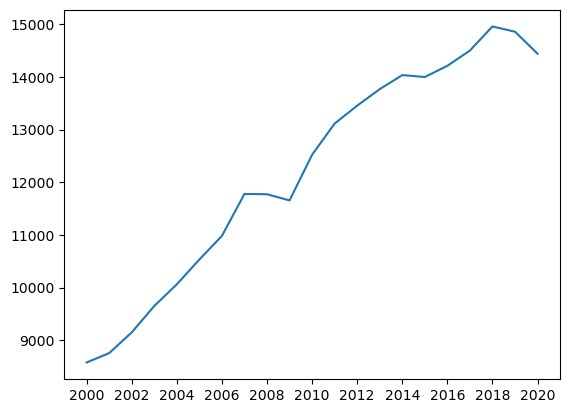

In [29]:
# 12 

data_2000_2020 = data[(data.Year >= 2000) & (data.Year <= 2020)]
total_Electricity = data_2000_2020.groupby('Year')['Electricity from fossil fuels (TWh)'].sum().reset_index()

plt.plot(total_Electricity['Year'], total_Electricity['Electricity from fossil fuels (TWh)'])
plt.xticks(np.arange(2000, 2021, 2))
plt.show()

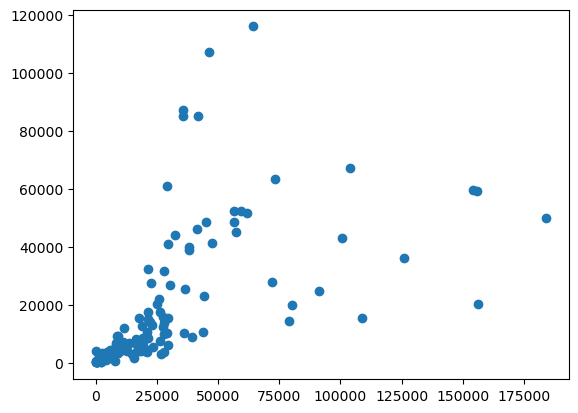

In [5]:
# 14 a

data_2020 = data[data.Year == 2020]

plt.scatter(data_2020['Primary energy consumption per capita (kWh/person)'], data_2020['gdp_per_capita'])
plt.show()